**CROP PREDICTION USING MACHINE LEARNING**

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the input data**

In [2]:
# Reading the input file
data = pd.read_csv("/content/indiancrop_dataset.csv")
data.head() # displays the first five rows of the dataframe

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [3]:
seventh_column = data.pop('STATE')
data.insert(0, 'STATE', seventh_column)
data.head(2)

,STATE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Rice
1,Andaman and Nicobar,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Rice


In [4]:
sixth_column = data.pop('ph')
data.insert(4, 'ph', sixth_column)
data.head(2)

,STATE,N_SOIL,P_SOIL,K_SOIL,ph,TEMPERATURE,HUMIDITY,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,90,42,43,6.502985,20.879744,82.002744,202.935536,7000,Rice
1,Andaman and Nicobar,85,58,41,7.038096,21.770462,80.319644,226.655537,5000,Rice


**Analyzing the Data**

In [5]:
data.shape   # returns a tuple of array dimension that specifies the number of rows and columns

(2200, 10)

In [6]:
data.info()   # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        2200 non-null   object 
 1   N_SOIL       2200 non-null   int64  
 2   P_SOIL       2200 non-null   int64  
 3   K_SOIL       2200 non-null   int64  
 4   ph           2200 non-null   float64
 5   TEMPERATURE  2200 non-null   float64
 6   HUMIDITY     2200 non-null   float64
 7   RAINFALL     2200 non-null   float64
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [7]:
# checking for null values
data.isnull().any()

STATE          False
N_SOIL         False
P_SOIL         False
K_SOIL         False
ph             False
TEMPERATURE    False
HUMIDITY       False
RAINFALL       False
CROP_PRICE     False
CROP           False
dtype: bool

In [8]:
data.columns

Index(['STATE', 'N_SOIL', 'P_SOIL', 'K_SOIL', 'ph', 'TEMPERATURE', 'HUMIDITY',
       'RAINFALL', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [9]:
# list of various crops
data['CROP'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: CROP, dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [10]:
data.describe() # returns the statistical summary of the data

,N_SOIL,P_SOIL,K_SOIL,ph,TEMPERATURE,HUMIDITY,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480,25.616244,71.481779,103.463655,2689.228182
std,36.917334,32.985883,50.647931,0.773938,5.063749,22.263812,54.958389,3710.361267
min,0.000000,5.000000,5.000000,3.504752,8.825675,14.258040,20.211267,2.000000
25%,21.000000,28.000000,20.000000,5.971693,22.769375,60.261953,64.551686,950.000000
50%,37.000000,51.000000,32.000000,6.425045,25.598693,80.473146,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,6.923643,28.561654,89.948771,124.267508,3500.000000
max,140.000000,145.000000,205.000000,9.935091,43.675493,99.981876,298.560117,120000.000000


**Correlation Visualization**

>*Phosphorous(P) and Potasium (K) levels of the soil are highly correlated.*

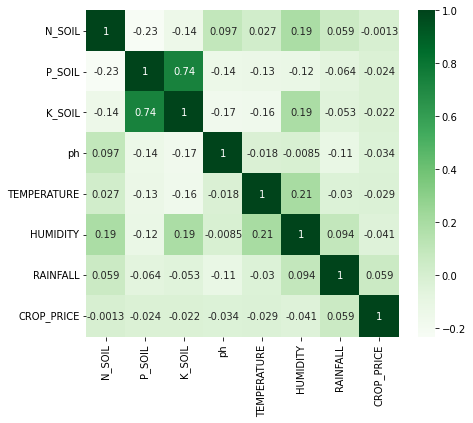

In [11]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(), cmap = "Greens", annot = True)

**Crop Type Distribution**

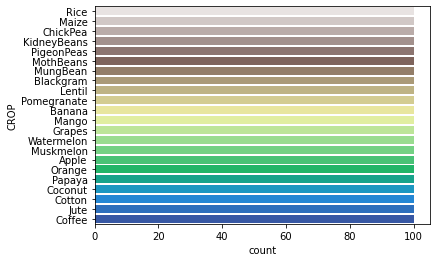

In [12]:
sns.countplot(y = 'CROP', data=data, palette="terrain_r") 

**Distribution between two features (diagonal)**

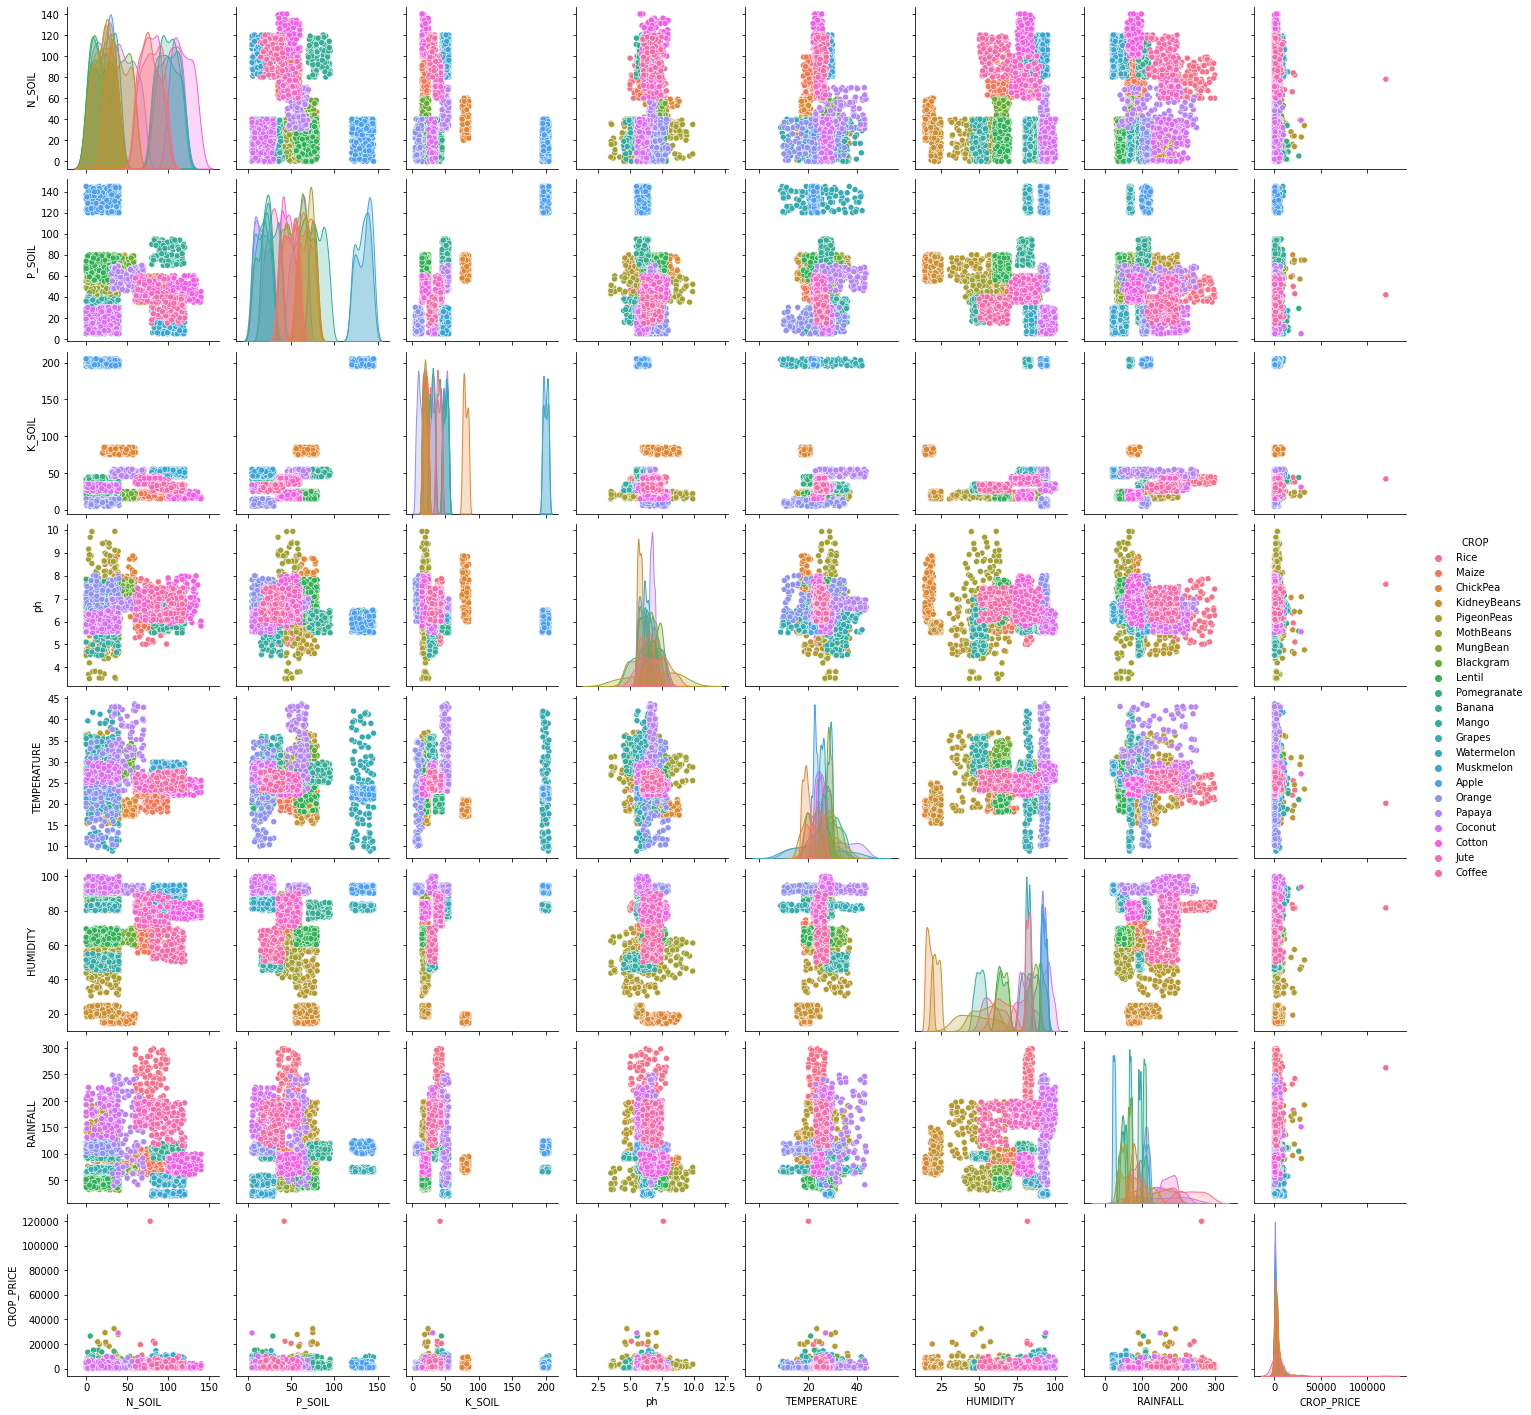

In [13]:
sns.pairplot(data, hue = 'CROP')

**Data Preprocessing**

In [14]:
# Checking the categorical columns
obj = (data.dtypes == 'object')
obj_columns = list(obj[obj].index)
print('Categorical Columns are ', obj_columns)

Categorical Columns are  ['STATE', 'CROP']


In [15]:
data['STATE'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Chattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [16]:
# Converting categorical data into numerical
data['STATE'] = data['STATE'].astype('category')
data['STATE'] = data['STATE'].cat.codes
data['STATE'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int8)

In [17]:
data['STATE'].nunique()

26

In [18]:
data.head(3)

,STATE,N_SOIL,P_SOIL,K_SOIL,ph,TEMPERATURE,HUMIDITY,RAINFALL,CROP_PRICE,CROP
0,0,90,42,43,6.502985,20.879744,82.002744,202.935536,7000,Rice
1,0,85,58,41,7.038096,21.770462,80.319644,226.655537,5000,Rice
2,0,60,55,44,7.840207,23.004459,82.320763,263.964248,7000,Rice


**Feature Scaling**

In [19]:
y = data.CROP
y.head(2)

0    Rice
1    Rice
Name: CROP, dtype: object

In [20]:
X = data.drop(['CROP'],axis=1)
X.head(3)

,STATE,N_SOIL,P_SOIL,K_SOIL,ph,TEMPERATURE,HUMIDITY,RAINFALL,CROP_PRICE
0,0,90,42,43,6.502985,20.879744,82.002744,202.935536,7000
1,0,85,58,41,7.038096,21.770462,80.319644,226.655537,5000
2,0,60,55,44,7.840207,23.004459,82.320763,263.964248,7000


**spliting of train and test dataset**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression**

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print('Accuracy gained using Logistic Regression: ', accuracy_score(y_test,y_pred))

Accuracy gained using Logistic Regression:  0.9672727272727273


In [29]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix",confusion_matrix(y_test,y_pred),'\n')

confusion_matrix [[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  1  0  0 19  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0 

**Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
print('Accuracy gained using Random Forest: ', accuracy_score(y_test,y_pred))

Accuracy gained using Random Forest:  0.9672727272727273


In [31]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix",confusion_matrix(y_test,y_pred),'\n')

confusion_matrix [[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  1  0  0 19  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0 

In [27]:
import pickle
result="crop_prediction.pkl"
pickle.dump(classifier,open('crop_prediction.pkl','wb'))